### Measurements Visualizer

In [36]:

# Partial Ranker
#
# Copyright (C) 2019-2024, Aravind Sankaran
# IRTG-2379: Modern Inverse Problems, RWTH Aachen University, Germany
# HPAC, Umeå University, Sweden
#
# This program is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program.  If not, see <http://www.gnu.org/licenses/>.
#
# Contributors:
# - Aravind Sankaran

import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from typing import List

class MeasurementsVisualizer:
    """
    Class for visualizing sets of measurements.

    Attributes:
        measurements (dict): A dictionary containing measurements.
                            Keys are object IDs (str), and values are lists of measurement values (float).
        obj_seq (list): A list containing the sequence of object IDs. If not provided, it defaults to a random order.
    """
    
    def __init__(self, measurements:dict, obj_seq:List=None):
        """
        Initializes a MeasurementsVisualizer object.
        
        Args:
            measurements (dict): A dictionary containing measurements.
                                Keys are object IDs (str), and values are lists of measurement values (float).
            obj_seq (list): A list containing the sequence of object IDs. If not provided, it defaults to a random order.
        """
        self.measurements = measurements
        self.obj_seq = obj_seq
        if not obj_seq:
            self.obj_seq = list(self.measurements.keys())

    def remove_outliers(self,x:List[float]) -> List[float]:
        """
        Remove outliers from a list of measurements.

        Args:
            x (List[float]): A list of measurement values.

        Returns:
            List[float]: A list of measurement values with outliers removed.

        This method calculates the first and third quartiles (Q1 and Q3) and the interquartile range (IQR) 
        of the input list of measurements. Outliers are then identified as values that fall below Q1 - 1.5 * IQR 
        or above Q3 + 1.5 * IQR. The method returns a new list containing only the non-outlier measurements.
        """
        
        x = np.array(x)
        q1, q2 = np.percentile(x, [25, 75])
        iqr = q2 - q1
        fence_low = q1 - 1.5 * iqr
        fence_high = q2 + 1.5 * iqr
        return list(x[(x > fence_low) & (x < fence_high)])

    def show_measurement_histograms(self, obj_list:List=None, bins=10, hspace=0.5):
        """Displays a subplot with a histogram of measurements for each object in obj_list.

        Args:
            obj_list (List, optional): The subplots are shown only for the those objects in the list. The subplots are arranged according to the order of the objects in the list.
            Defaults to a random order of all objects.
            
            bins (int, optional): bins the measurements values. Defaults to 10.
            
            hspace (float, optional): matplotlib paramater to control the space between the subplots. Defaults to 0.5.
        """
        
        if not obj_list:
            obj_list = self.obj_seq
        obj_list.sort()

        n = len(obj_list)
        fig = plt.figure(figsize=(7, 3 * n))
        gs = gridspec.GridSpec(n, 1, height_ratios=[1] * n)

        ax = [None] * n
        for i in range(n):
            if i != 0:
                ax[i] = plt.subplot(gs[i], sharex=ax[0])
            else:
                ax[i] = plt.subplot(gs[i])
            ax[i].set_title(obj_list[i])
            ax[i].hist(self.measurements[obj_list[i]], bins=bins)
            ax[i].xaxis.set_major_formatter(FormatStrFormatter('%.e'))

        plt.subplots_adjust(hspace=hspace)
        plt.show()

    def show_measurements_boxplots(self, obj_list=None, outliers=False, scale=1.5, tick_size=12):
        """Displays a graph with a boxplot of measurements for each object in obj_list.

        Args:
            obj_list (List, optional): The boxplots are shown only for the those objects in the list. The boxplots are arranged according to the order of the objects in the list.
            Defaults to a random order of all objects.
            
            outliers (bool, optional): Include outliers to calculate the box range. Defaults to False.
            scale (float, optional): matplotlib param to control the size of the plot. Defaults to 1.5.
            tick_size (int, optional): matplotlib param to control the size of the axis labels. Defaults to 12.

        Returns:
            fig: matplotlib figure.
        """
        if not obj_list:
            obj_list = self.obj_seq
        # obj_list.sort()

        x = []
        y = []
        for obj in obj_list:
            x.append(self.measurements[obj])
            y.append(obj)

        fig = plt.figure(figsize=(10, scale*len(obj_list)))
        ax = fig.add_subplot(111)

        # # Creating axes instance
        bp = ax.boxplot(x, patch_artist=True,
                        notch=False, vert=0, showfliers=outliers,
                        positions=range(len(y)),zorder=0)

        x_lim = ax.get_xlim()


        colors = ['#E1E8E8'] * len(y)

        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

        # changing color and linewidth of
        # whiskers
        for whisker in bp['whiskers']:
            whisker.set(color='#8B008B',
                        linewidth=1.5,
                        linestyle=":")

        # changing color and linewidth of
        # caps
        for cap in bp['caps']:
            cap.set(color='#8B008B',
                    linewidth=2)

        # changing color and linewidth of
        # medians
        for median in bp['medians']:
            median.set(color='red',
                    linewidth=2)

        try:
            sp = ax.plot(x, y, 'b.', alpha=0.9,zorder=10)
            ax.set_xlim(x_lim)
        except:
            pass

        # y-axis labels
        ax.set_yticklabels(y)

        # Removing top axes and right axes
        # ticks
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.xaxis.set_tick_params(labelsize=tick_size)
        ax.yaxis.set_tick_params(labelsize=tick_size)
        ax.set_xlabel('time (s)', fontsize = tick_size)

        #plt.show()
        return fig

    def show_measurements_violinplot(self, obj_list=None, outliers=False, scale=1.5):
        """Displays a graph with a violinplot of measurements for each object in obj_list.

        Args:
            obj_list (List, optional): The violinplots are shown only for the those objects in the list. The violinplots are arranged according to the order of the objects in the list.
            Defaults to a random order of all objects.
            
            outliers (bool, optional): Include outliers to calculate the box range. Defaults to False.
            scale (float, optional): matplotlib param to control the size of the plot. Defaults to 1.5.

        Returns:
            fig: matplotlib figure.
        """
        if not obj_list:
            obj_list = self.obj_seq

        fig = plt.figure(figsize=(10, scale * len(obj_list)))
        ax = fig.add_subplot(111)

        x_b = []
        x_v = []
        y = []
        for obj in obj_list:
            data = self.remove_outliers(self.measurements[obj])
            x_v.append(data)
            x_b.append(self.measurements[obj])
            y.append(obj)

        # print(x)

        bp = ax.boxplot(x_b, patch_artist=True,
                        notch=False, vert=0, showfliers=outliers,
                        positions=range(len(y)))

        # # Creating axes instance
        vp = ax.violinplot(x_v, showmedians=False, vert=False, showextrema=False,
                        positions=range(len(y)))

        x_lim = ax.get_xlim()

        for i, data in enumerate(x_b):
            sp = ax.plot(data, np.ones(len(data)) * i, 'b.', alpha=0.9)
            ax.set_xlim(x_lim)

        colors = [(0.0, 0.0, 1.0, 0.05)] * len(y)
        edge_color = '#9FBCF5'

        for patch, color in zip(bp['boxes'], colors):
            plt.setp(patch, color=edge_color)
            patch.set_facecolor(color)

        # changing color and linewidth of
        # whiskers
        for whisker in bp['whiskers']:
            whisker.set(color='#8B008B',
                        linewidth=1.5,
                        linestyle=":")

        # changing color and linewidth of
        # caps
        for cap in bp['caps']:
            cap.set(color='#8B008B',
                    linewidth=2)

        # changing color and linewidth of
        # medians
        for median in bp['medians']:
            median.set(color='red',
                    linewidth=2)

        #ax.set_yticks(range(len(y)), labels=y)
        ax.set_yticklabels(y)

        # Removing top axes and right axes
        # ticks
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel('time (s)')

        #plt.show()
        return fig





Overwriting ../measurements_visualizer.py


#### Usage 

In [32]:
from partial_ranker.measurements_simulator import MeasurementsSimulator

In [33]:
obj_params = {}
obj_params['obj1']  = [0.2,0.02] # [mean, std]
obj_params['obj2']  = [0.2,0.01]
obj_params['obj3']  = [0.2,0.01]
obj_params['obj4']  = [0.19,0.01]
ms = MeasurementsSimulator(obj_params,seed=129)
reps = 20
ms.measure(reps=reps)

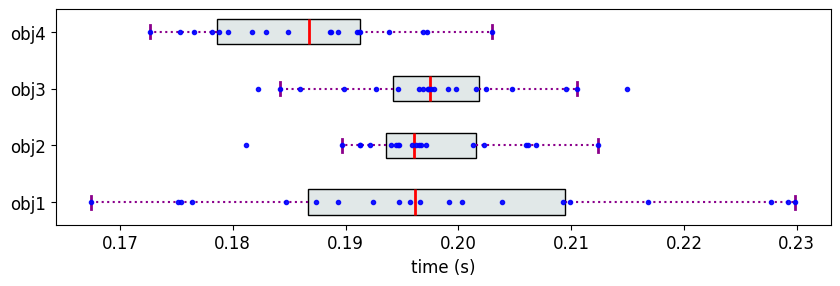

In [34]:
measurements = ms.get_measurements()
h0 = list(obj_params.keys())
mv = MeasurementsVisualizer(measurements, h0)
fig = mv.show_measurements_boxplots(scale=0.7)

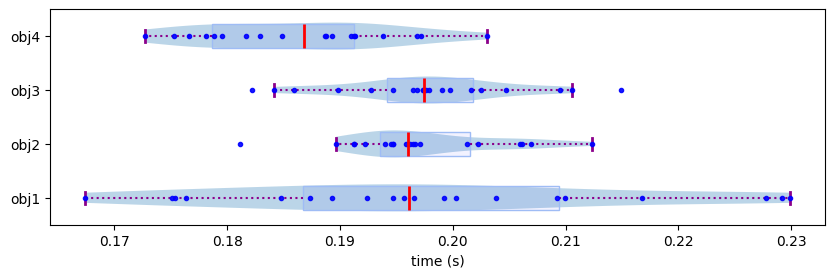

In [35]:
fig = mv.show_measurements_violinplot(scale=0.7)